In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings("ignore")

In [2]:
attrition = pd.read_csv('./employee_attrition_dataset.csv')

In [3]:
# Display the unique job roles in the dataset
unique_job_roles = attrition['JobRole'].unique()
print(unique_job_roles)


['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


#### Q: Problem Statement: Employee Attrition for IBM

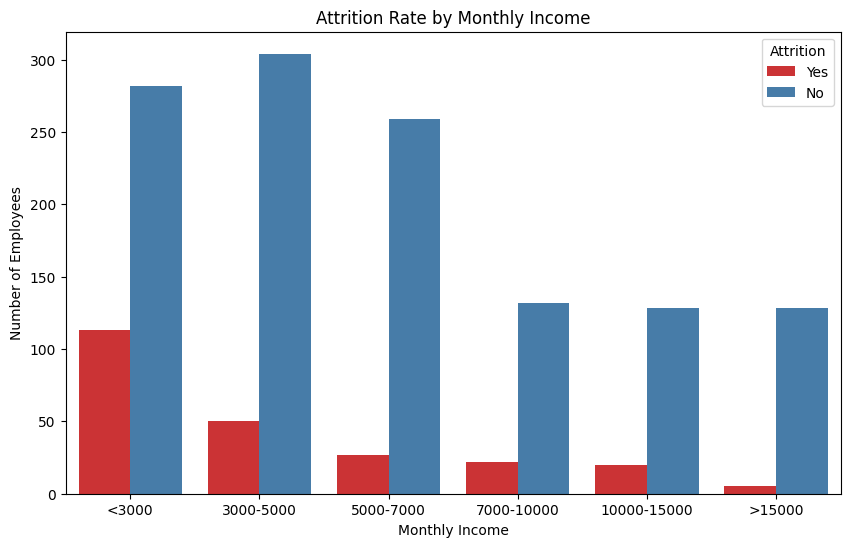

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'attrition' is your DataFrame and 'MonthlyIncome' and 'Attrition' are columns in it

# Creating income bins for better visualization
bins = [0, 3000, 5000, 7000, 10000, 15000, 20000]
labels = ['<3000', '3000-5000', '5000-7000', '7000-10000', '10000-15000', '>15000']
attrition['IncomeGroup'] = pd.cut(attrition['MonthlyIncome'], bins=bins, labels=labels)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='IncomeGroup', hue='Attrition', data=attrition, palette='Set1')
plt.title('Attrition Rate by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.show()


# Data Understanding and Analysis

In [4]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
attrition.shape

(1470, 35)

In [6]:
attrition.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#Replacing Yes with 1 and No with 0 in the Attrition column which is our target column
attrition['Attrition'] = np.where(attrition.Attrition == "Yes", 1,0)


In [9]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
attrition.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Variable Types

In [11]:
attrition.dtypes

Age                          int64
Attrition                    int32
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

categorical variables are showing the datatypes as object

In [12]:
attrition['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [13]:
categorical_features = attrition.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


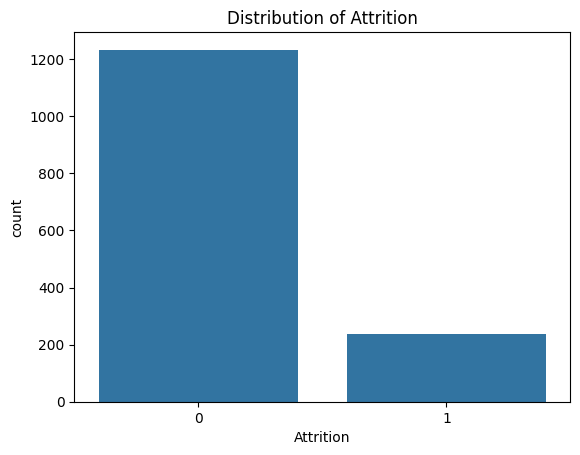

In [14]:
sns.countplot(x='Attrition', data=attrition)
plt.title('Distribution of Attrition')
plt.show()

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

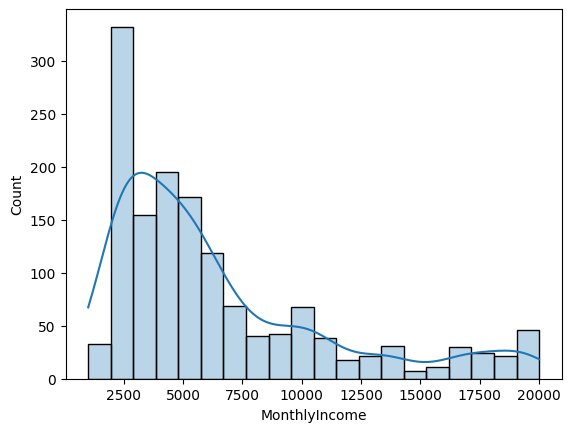

In [15]:
sns.histplot(attrition['MonthlyIncome'], kde=True, alpha = 0.3) 

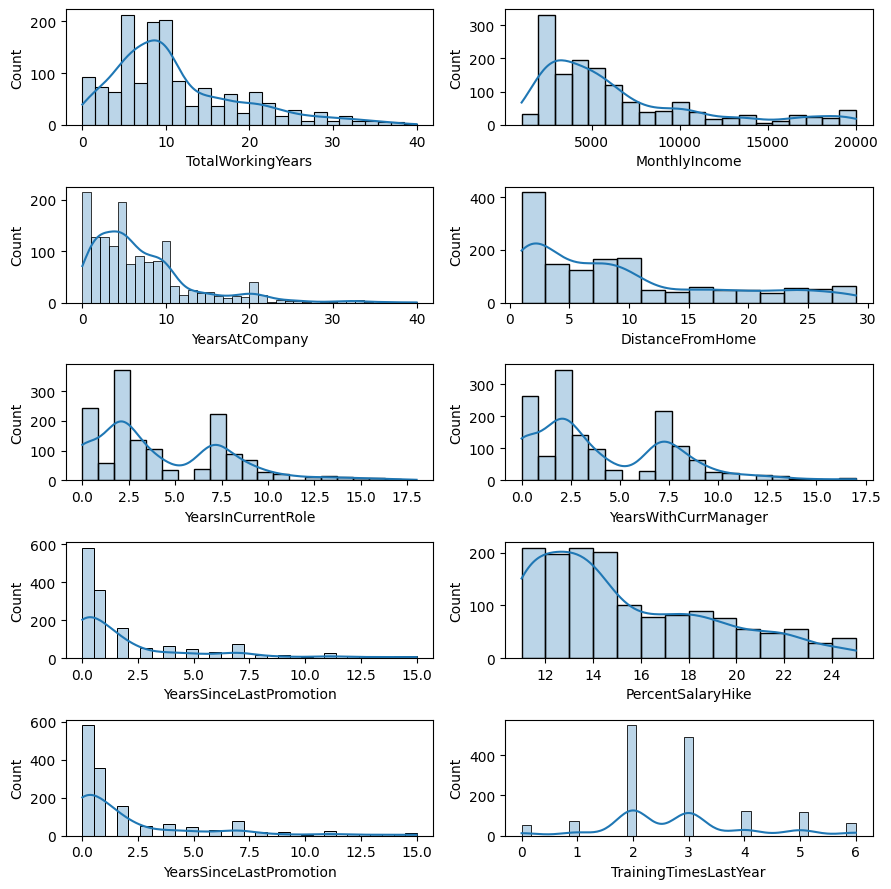

In [16]:
fig, ax = plt.subplots(5,2, figsize = (9,9))
sns.histplot(attrition['TotalWorkingYears'], kde=True, alpha = 0.3, ax = ax[0,0])
sns.histplot(attrition['MonthlyIncome'], kde=True, alpha = 0.3, ax = ax[0,1]) 
sns.histplot(attrition['YearsAtCompany'], kde=True, alpha = 0.3, ax = ax[1,0]) 
sns.histplot(attrition['DistanceFromHome'], kde=True, alpha = 0.3, ax = ax[1,1]) 
sns.histplot(attrition['YearsInCurrentRole'], kde=True, alpha = 0.3, ax = ax[2,0]) 
sns.histplot(attrition['YearsWithCurrManager'], kde=True, alpha = 0.3, ax = ax[2,1]) 
sns.histplot(attrition['YearsSinceLastPromotion'], kde=True, alpha = 0.3, ax = ax[3,0]) 
sns.histplot(attrition['PercentSalaryHike'], kde=True, alpha = 0.3, ax = ax[3,1]) 
sns.histplot(attrition['YearsSinceLastPromotion'], kde=True, alpha = 0.3, ax = ax[4,0]) 
sns.histplot(attrition['TrainingTimesLastYear'], kde=True, alpha = 0.3, ax = ax[4,1])
plt.tight_layout()
plt.show()

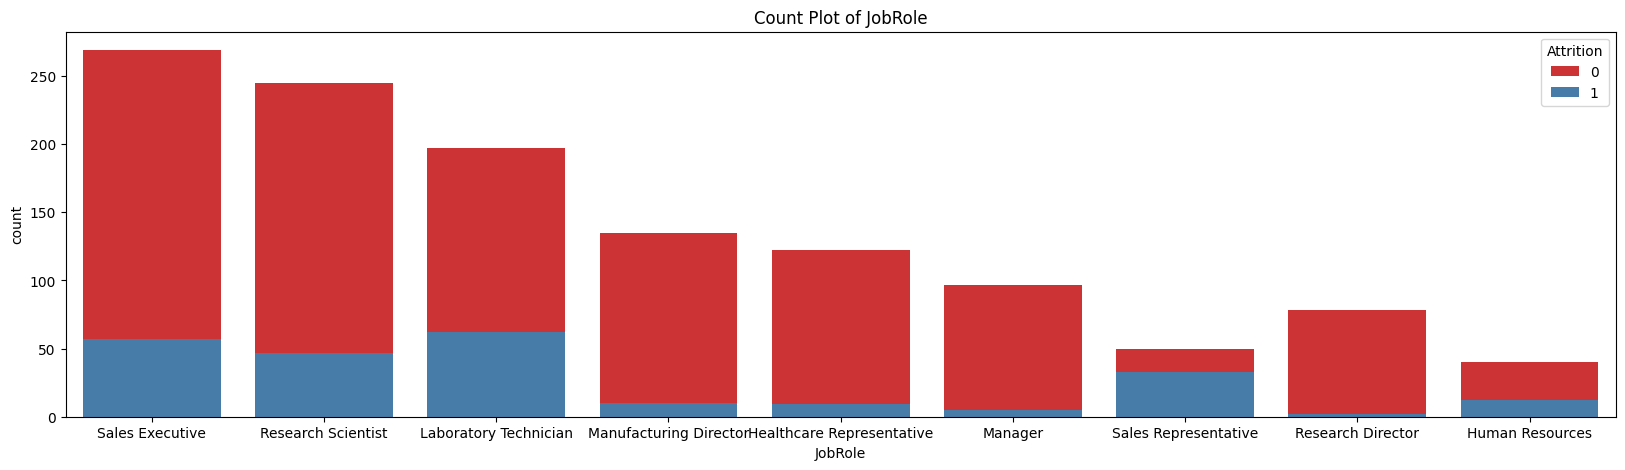

In [17]:
# Creating a count plot with a color palette

plt.figure(figsize=(20, 5))
sns.countplot(data=attrition, x='JobRole', hue='Attrition', palette='Set1', dodge=False).set_title('Count Plot of JobRole')
plt.show()

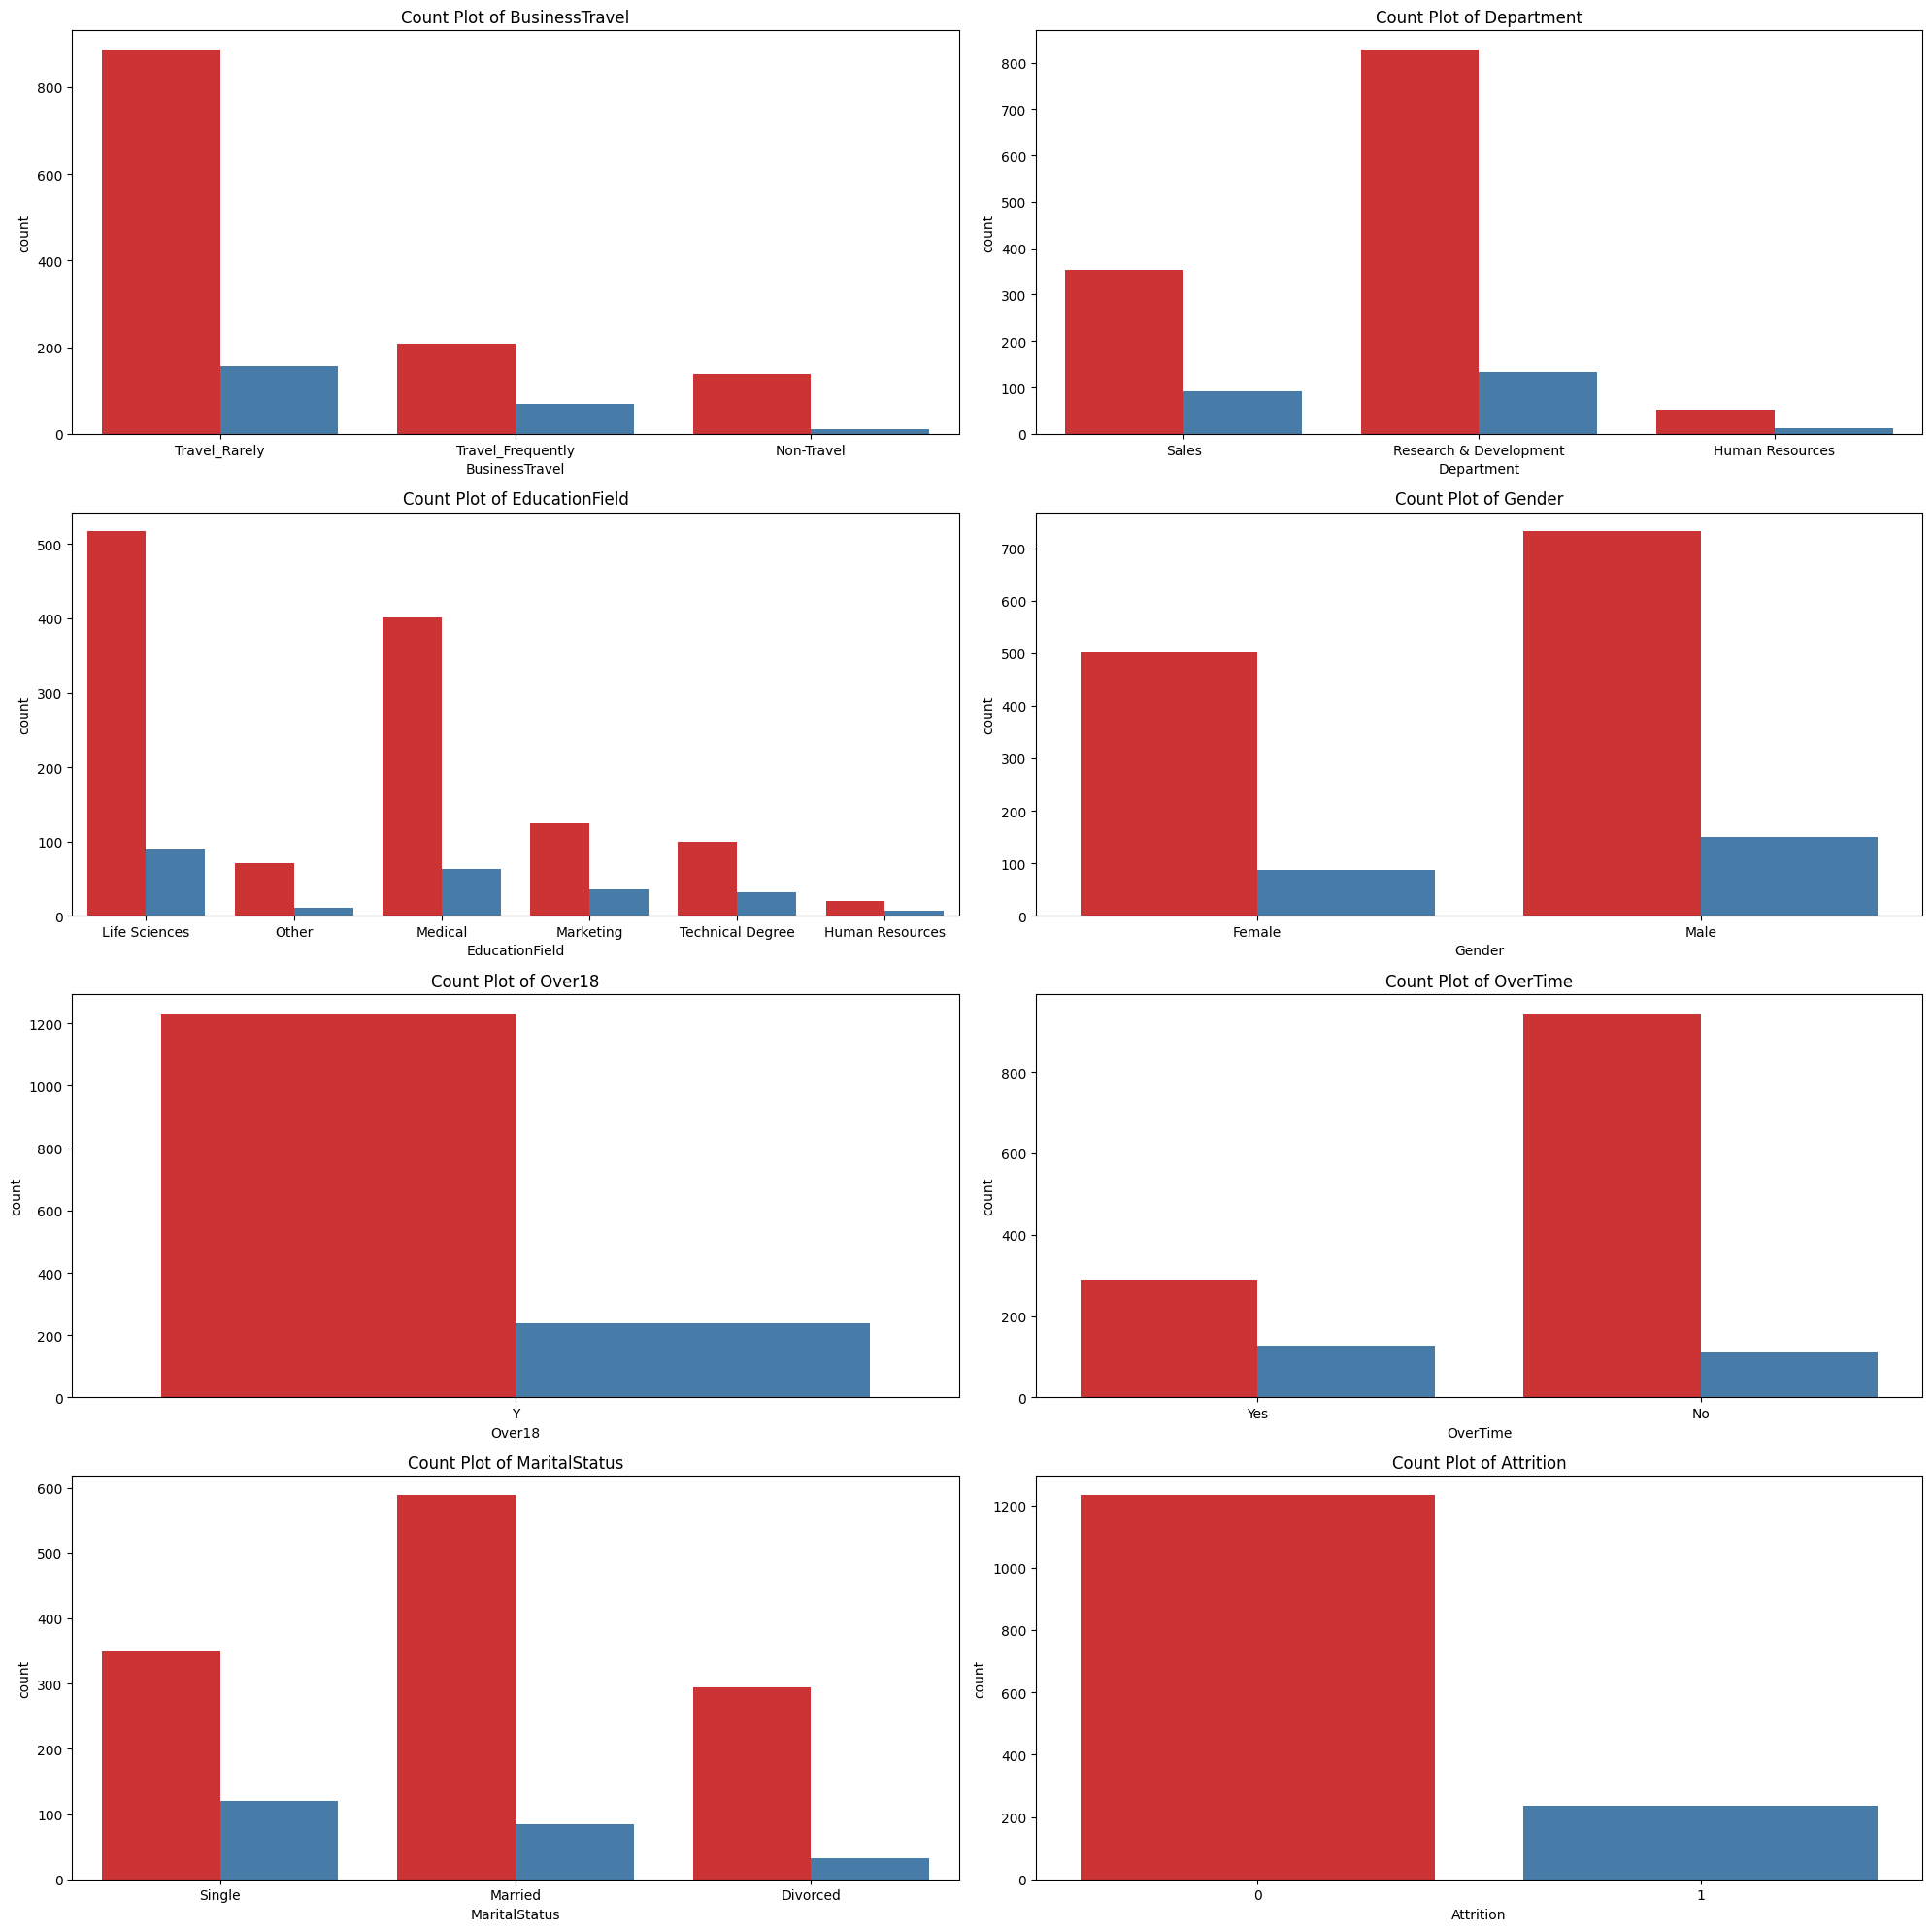

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(20,20))
features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 
    'Over18', 'OverTime', 'MaritalStatus', 'Attrition'
]

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.countplot(data=attrition, x=feature, hue='Attrition', palette='Set1', legend= False, ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()

In [19]:
total = attrition['Attrition'].count()
total

1470

In [20]:
zeros = attrition['Attrition'].value_counts()[0]
(zeros/total)*100

83.87755102040816

In [21]:
ones = attrition['Attrition'].value_counts()[1]
(ones/total)*100

16.122448979591837

## Outliers

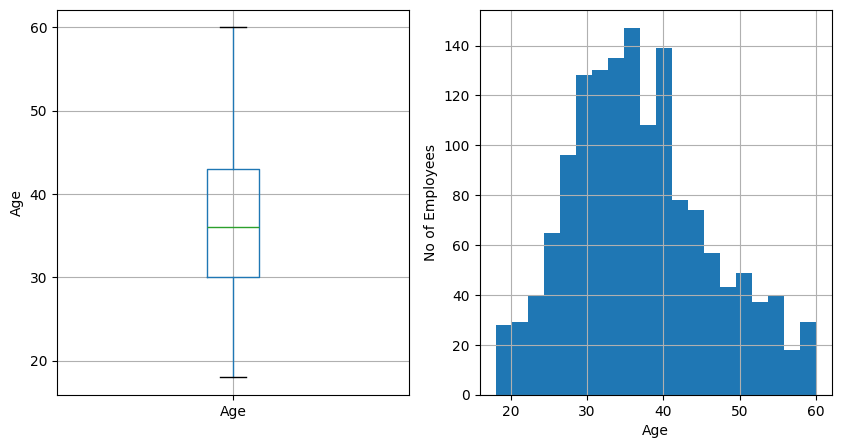

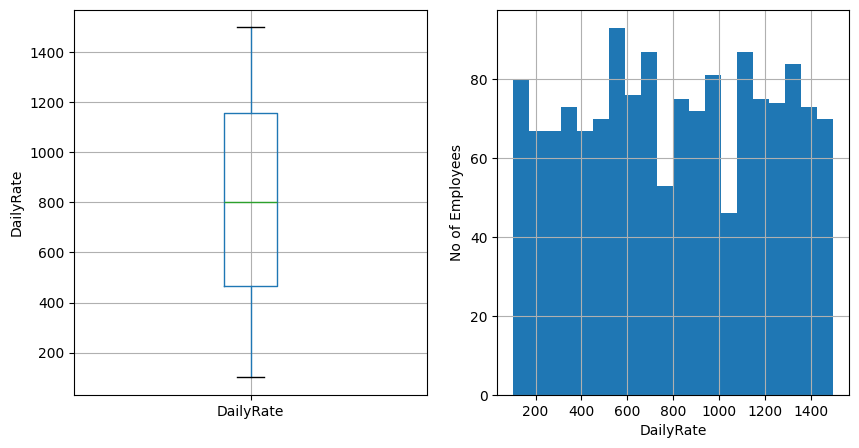

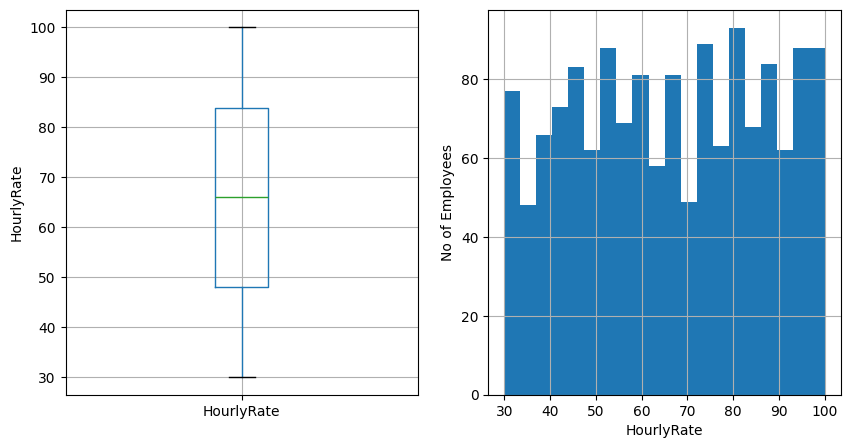

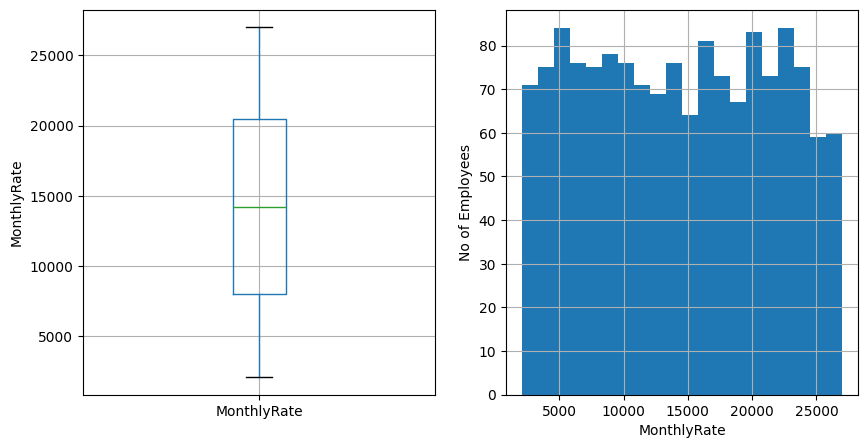

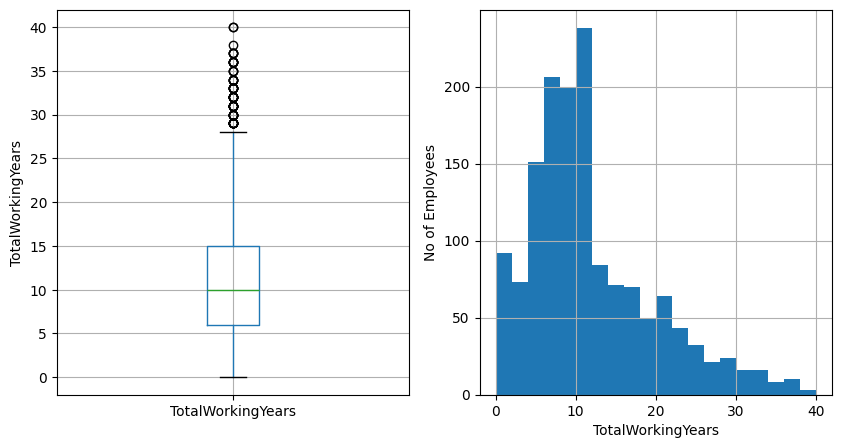

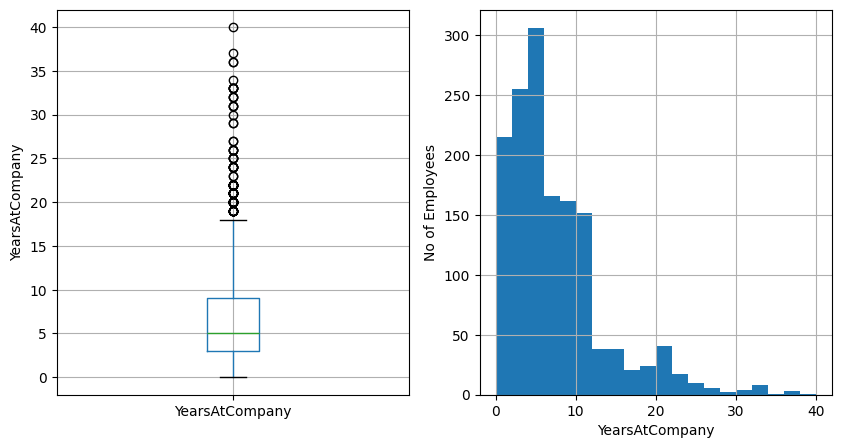

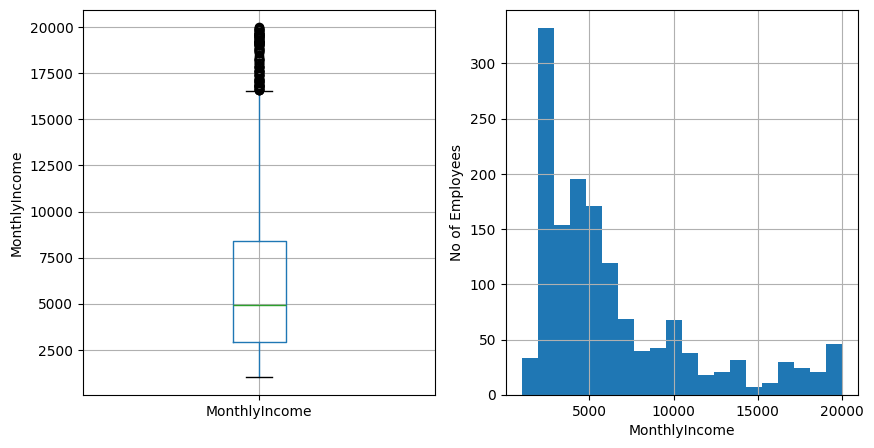

In [22]:
continuous = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome']
for var in continuous:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    fig = attrition.boxplot(column = var)
    fig.set_ylabel(var)
    
    plt.subplot(1,2,2)
    fig = attrition[var].hist(bins=20)
    fig.set_ylabel('No of Employees')
    fig.set_xlabel(var)
       
    plt.show()

Text(0, 0.5, 'MonthlyIncome')

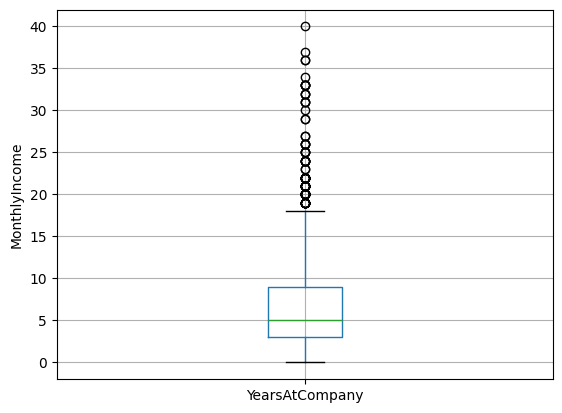

In [23]:
fig = attrition.boxplot(column = ['YearsAtCompany'])
fig.set_ylabel(var)

In [24]:
Q1 = attrition['YearsAtCompany'].quantile(0.25)
Q3 = attrition['YearsAtCompany'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
attrition = attrition[(attrition['YearsAtCompany'] >= lower_bound) & (attrition['YearsAtCompany'] <= upper_bound)]

Text(0, 0.5, 'MonthlyIncome')

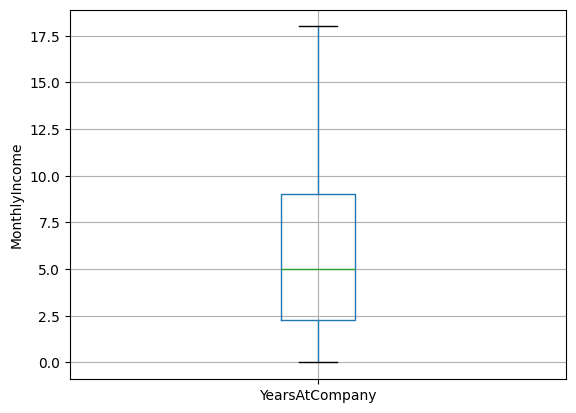

In [27]:
fig = attrition.boxplot(column = ['YearsAtCompany'])
fig.set_ylabel(var)

With the last attrition graph we see the data imbalance in our dataset i.e., there are more retaining employees than leaving, hence we also have to take care of this issue using SMOTE analysis.

In [28]:
categorical = attrition.select_dtypes(include = 'object')
print(len(categorical.columns))
categorical

8


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [29]:
numerical = attrition.select_dtypes(include= ['float64', 'int64'])
print(len(numerical.columns))
numerical

26


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


We have 13 contonious attribute, 2 constant -> standard hour and employee count, 9 discrete variables, 1 binary -> stock option level attrition and id variable as employee number : 10:35 part 2 

In [30]:
categorical.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [31]:
numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [32]:
correlation_matrix = numerical.corr()
correlation_matrix

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.022328,-0.008366,0.212784,NaN,0.001512,0.015493,0.028531,0.042570,0.467836,...,0.037165,NaN,0.052577,0.649228,-0.024799,-0.019551,0.150222,0.127401,0.119274,0.111840
DailyRate,0.022328,1.000000,-0.008730,-0.018402,NaN,-0.051715,0.040308,0.013201,0.043022,0.025288,...,0.009254,NaN,0.046338,0.042783,0.009617,-0.046476,0.000321,0.019102,0.000520,-0.013359
DistanceFromHome,-0.008366,-0.008730,1.000000,0.011525,NaN,0.026952,-0.027015,0.036680,0.007310,0.022326,...,0.013615,NaN,0.044259,0.003899,-0.026974,-0.037669,0.013063,0.021018,0.020094,0.003707
Education,0.212784,-0.018402,0.011525,1.000000,NaN,0.044090,-0.023642,0.008213,0.041103,0.117897,...,-0.001342,NaN,0.032658,0.158406,-0.027724,0.007281,0.081606,0.082674,0.077089,0.054068
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.001512,-0.051715,0.026952,0.044090,NaN,1.000000,0.009409,0.044029,0.000745,-0.002970,...,-0.060647,NaN,0.067104,0.002296,0.016177,0.019432,0.022741,0.003009,0.004722,0.002251
EnvironmentSatisfaction,0.015493,0.040308,-0.027015,-0.023642,NaN,0.009409,1.000000,-0.037083,-0.010407,0.019801,...,0.005254,NaN,0.007482,0.002604,-0.018562,0.024590,0.013129,0.032262,0.012839,0.007187
HourlyRate,0.028531,0.013201,0.036680,0.008213,NaN,0.044029,-0.037083,1.000000,0.044921,-0.024261,...,0.006612,NaN,0.045670,-0.000054,-0.005246,-0.009807,-0.026309,-0.030958,-0.049791,-0.010831
JobInvolvement,0.042570,0.043022,0.007310,0.041103,NaN,0.000745,-0.010407,0.044921,1.000000,0.011895,...,0.031423,NaN,0.020575,0.020380,-0.014565,-0.009792,0.028268,0.020949,0.015769,0.044608
JobLevel,0.467836,0.025288,0.022326,0.117897,NaN,-0.002970,0.019801,-0.024261,0.011895,1.000000,...,-0.002793,NaN,0.035862,0.738896,-0.028962,0.044043,0.315263,0.284461,0.195598,0.240049


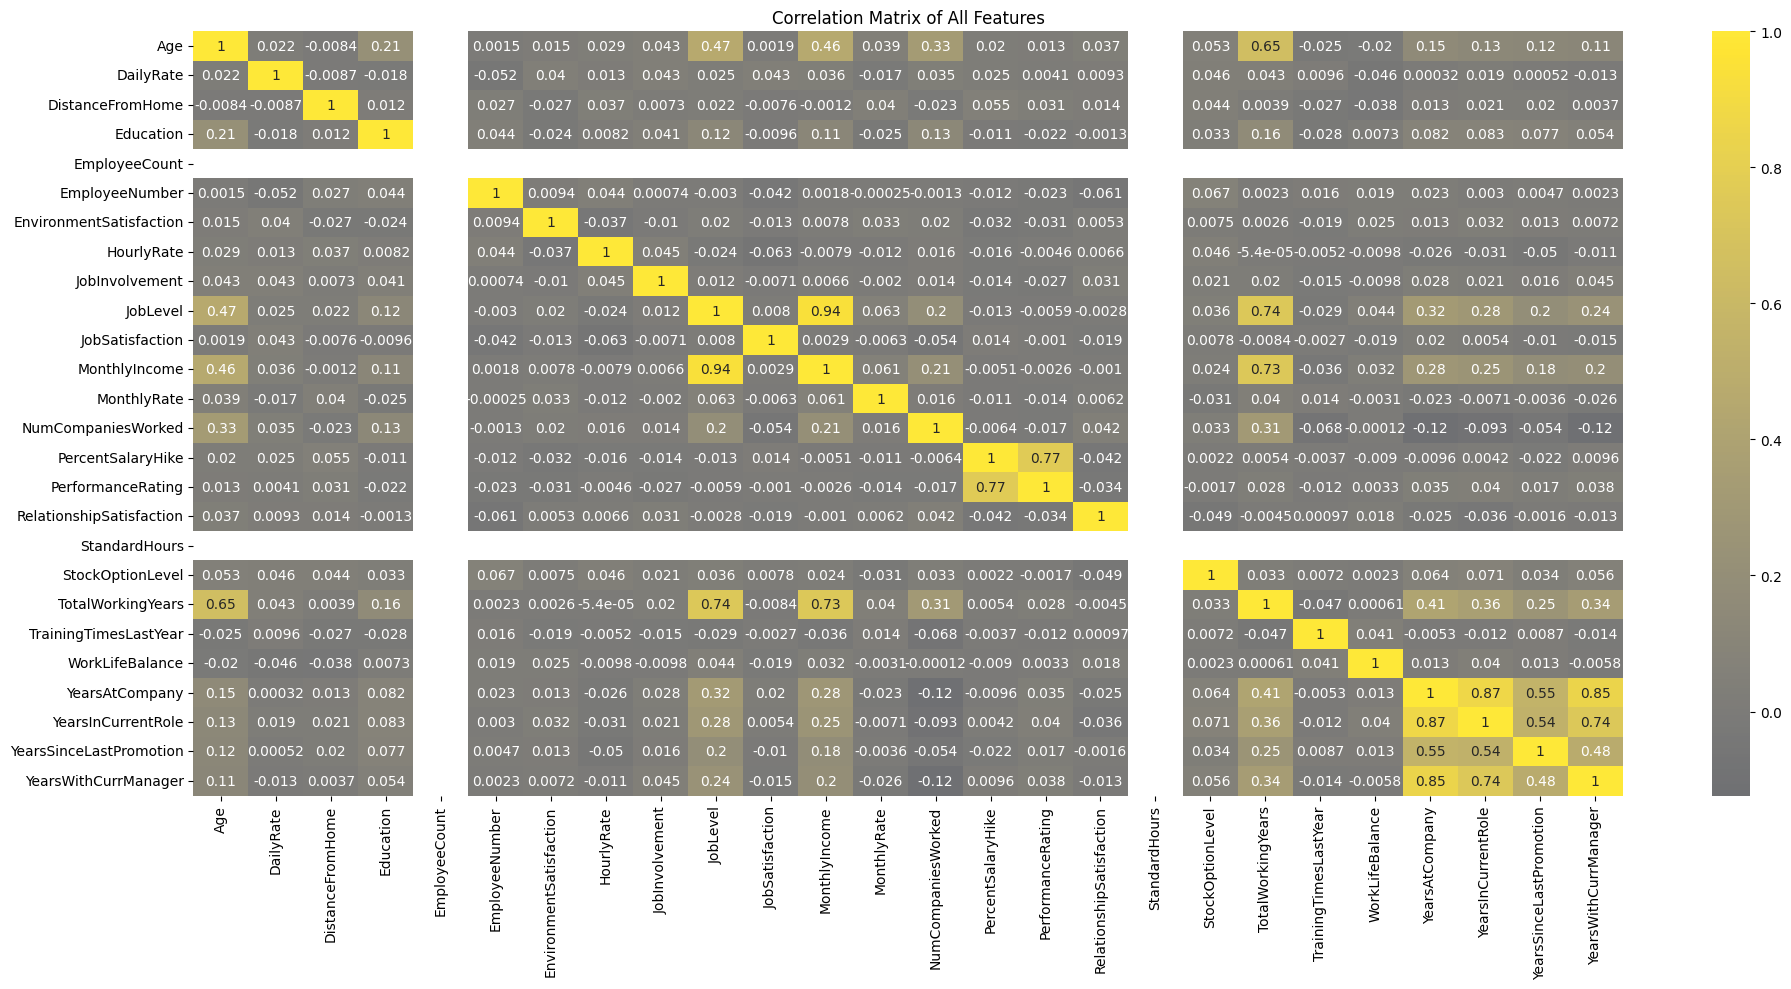

In [33]:
# Plot the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', center=0)
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()


#### Feature Selection

In [34]:
# One-hot encoding categorical variables
attrition_encoded = pd.get_dummies(attrition, columns=categorical_features, drop_first=True)
attrition_encoded.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing 

In [35]:
attrition_encoded = attrition_encoded.drop('JobLevel', axis=1)
attrition_encoded = attrition_encoded.drop('TotalWorkingYears', axis=1)
attrition_encoded = attrition_encoded.drop('YearsInCurrentRole', axis=1)
attrition_encoded = attrition_encoded.drop('YearsWithCurrManager', axis=1)
attrition_encoded = attrition_encoded.drop('YearsSinceLastPromotion', axis=1)
attrition_encoded = attrition_encoded.drop('Department_Sales', axis=1)
attrition_encoded = attrition_encoded.drop('PercentSalaryHike', axis=1)
attrition_encoded = attrition_encoded.drop('MonthlyIncome', axis=1)
attrition_encoded = attrition_encoded.drop('Department_Research & Development', axis=1)
attrition_encoded = attrition_encoded.drop('BusinessTravel_Travel_Rarely', axis=1)
attrition_encoded = attrition_encoded.drop('MaritalStatus_Single', axis=1)
attrition_encoded = attrition_encoded.drop('EducationField_Marketing', axis=1)
attrition_encoded = attrition_encoded.drop('EducationField_Life Sciences', axis=1)

In [36]:
correlation_matrix2 = attrition_encoded.corr()
correlation_matrix2;

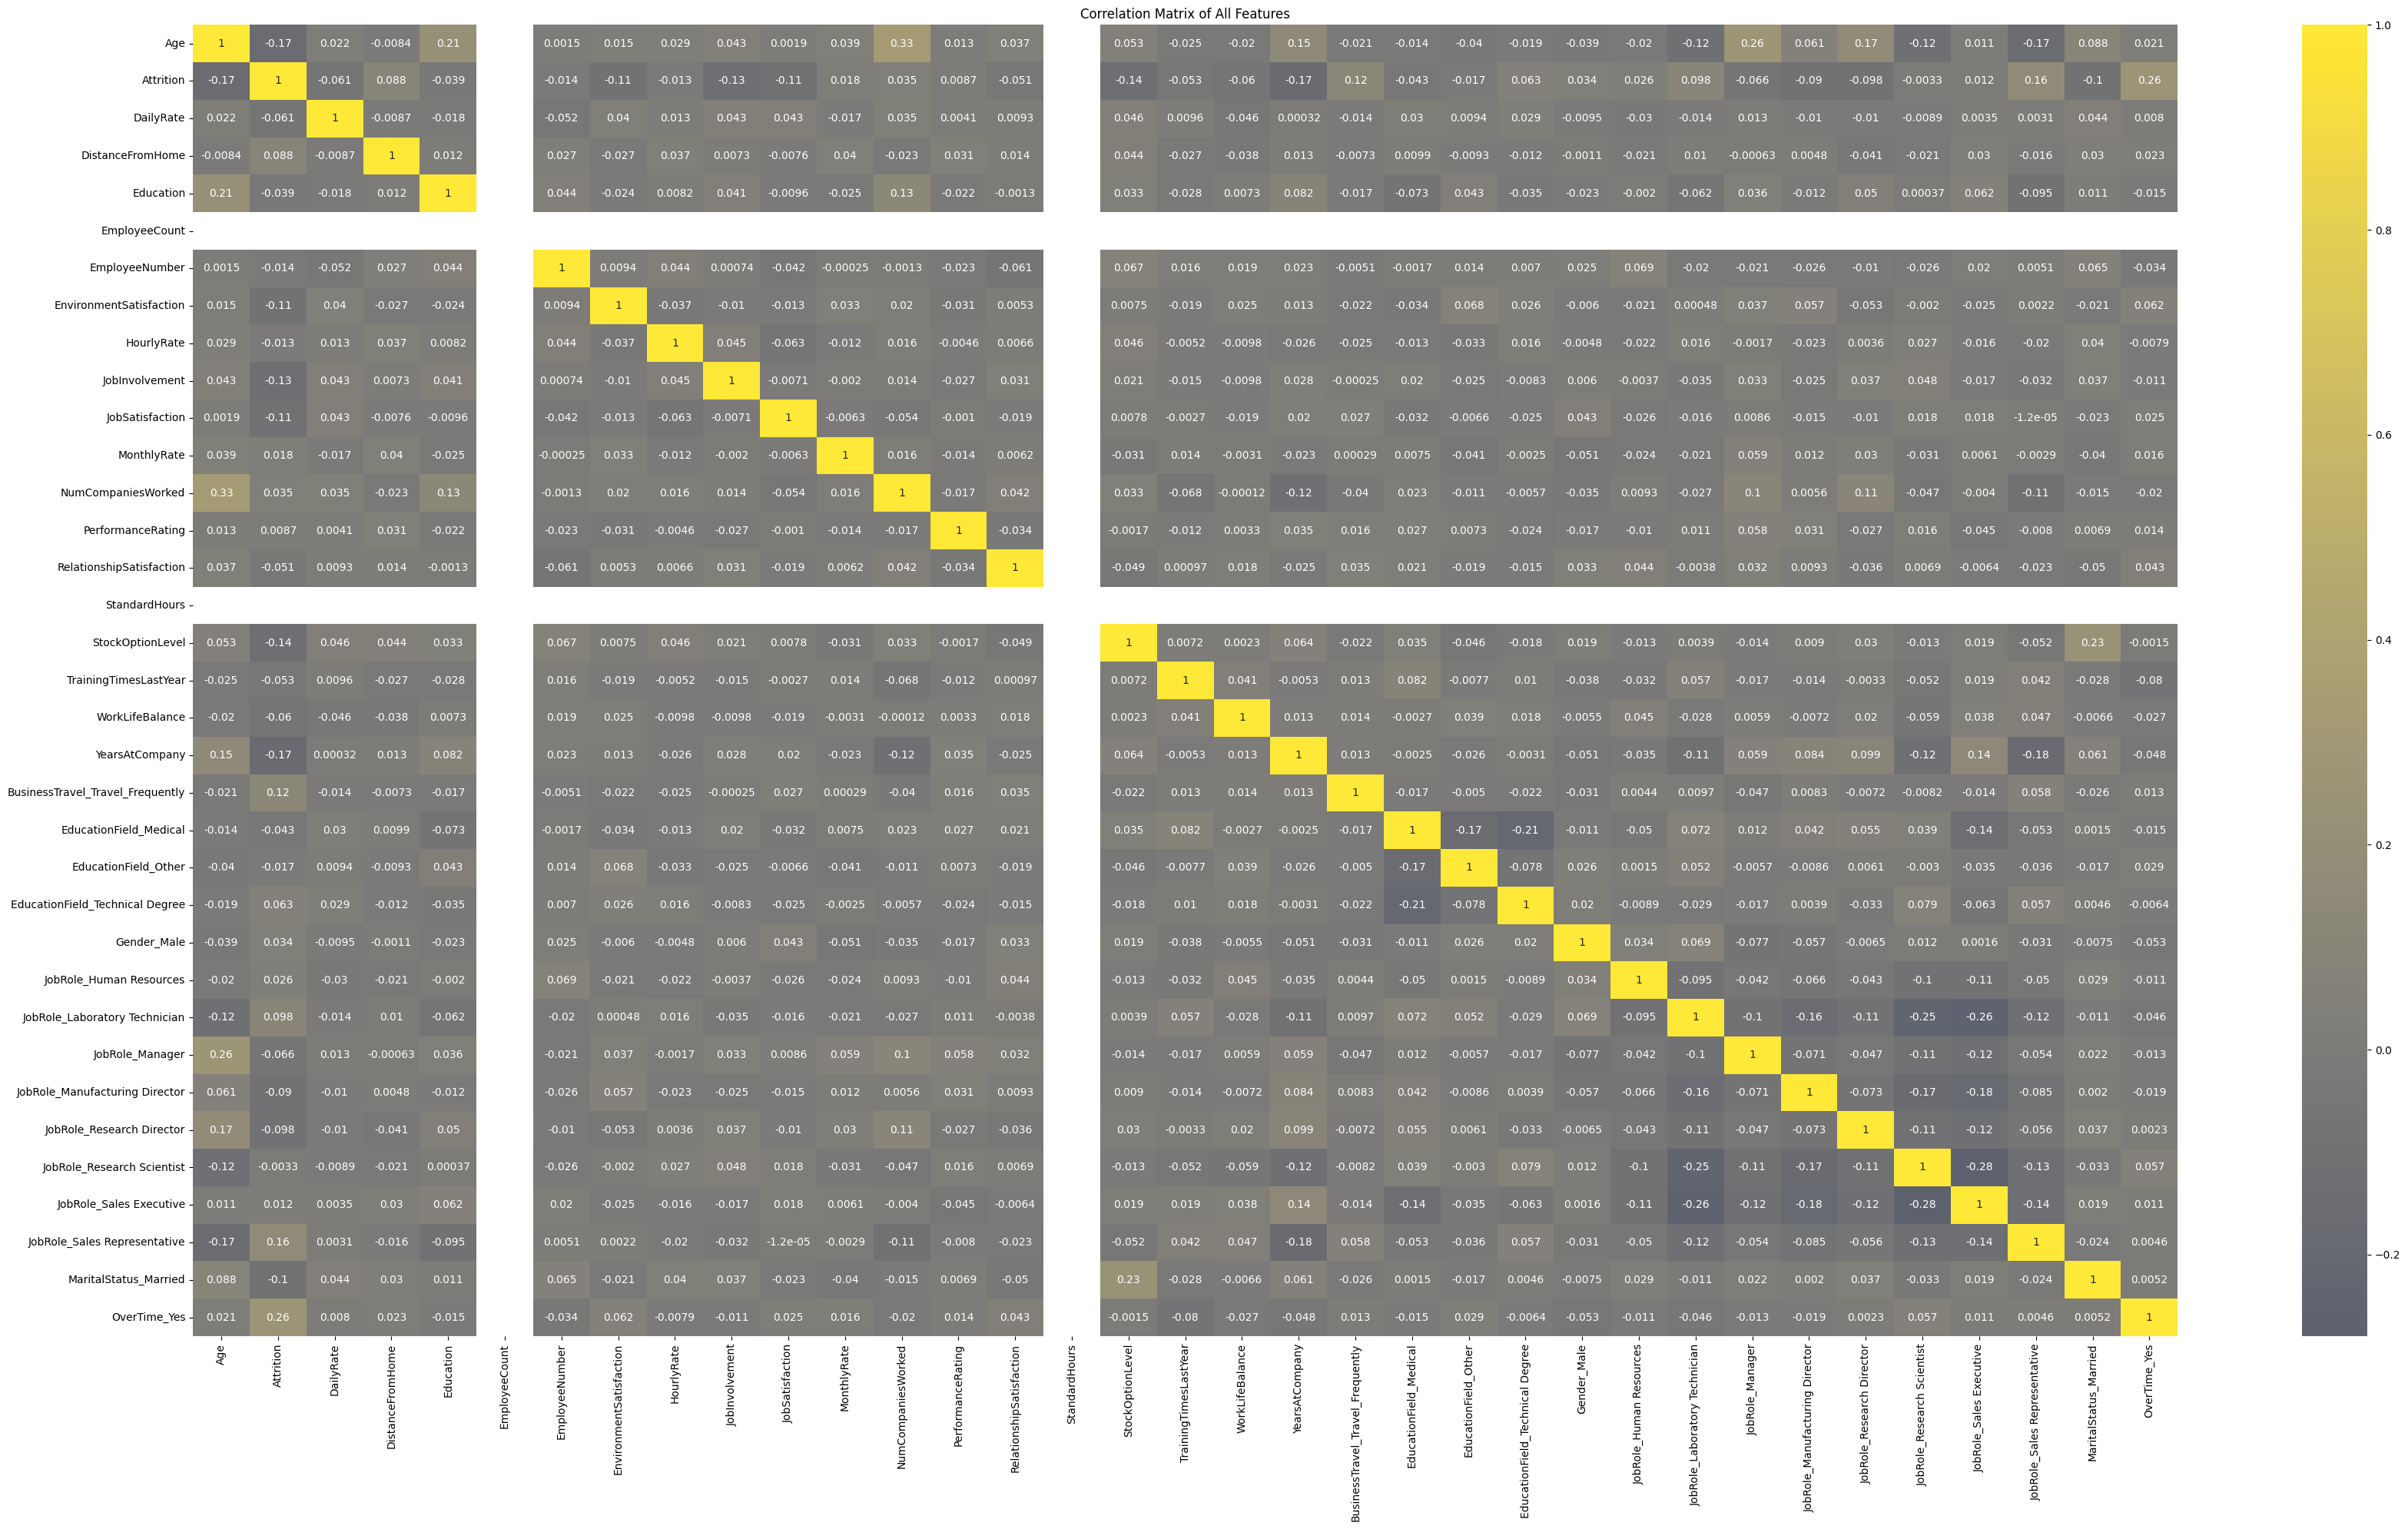

In [37]:
# Plot the correlation matrix
plt.figure(figsize=(35, 20))
sns.heatmap(correlation_matrix2, annot=True, cmap='cividis', center=0)
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()


# Model Builing

In [38]:
# Features and target variable
x = attrition_encoded.drop('Attrition', axis=1)
y = attrition_encoded['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)


In [39]:
num_variables = len(x.columns)
print(f"Number of variables (features): {num_variables}")
x.columns

Number of variables (features): 34


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'BusinessTravel_Travel_Frequently',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'OverTime_Yes'],
      dtype='object')

In [40]:
training = x_train['HourlyRate'].value_counts(normalize=True).sort_values()
print(training)
training.sum()

HourlyRate
70    0.006276
34    0.006276
68    0.007322
69    0.008368
39    0.008368
        ...   
96    0.019874
45    0.019874
46    0.020921
87    0.021967
66    0.023013
Name: proportion, Length: 71, dtype: float64


1.0

In [41]:
total = y_test.count()
total

410

In [42]:
zeros = y_test.value_counts()[0]
(zeros/total)*100

83.41463414634146

In [43]:
ones = y_test.value_counts()[1]
(ones/total)*100

16.585365853658537

In [44]:
testing = x_test['HourlyRate'].value_counts(normalize=True).sort_values()
print(testing)
testing.sum()

HourlyRate
91    0.002439
90    0.002439
31    0.004878
97    0.004878
78    0.004878
        ...   
84    0.024390
80    0.024390
79    0.026829
81    0.026829
42    0.031707
Name: proportion, Length: 71, dtype: float64


1.0000000000000002

In [45]:
#Drop JobLevel and TotalWorkingYears

Feature Scaling

In [46]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on training data, and transform on testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## Baseline Models

##### Random Forest Classifier

In [47]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[341   1]
 [ 59   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       342
           1       0.90      0.13      0.23        68

    accuracy                           0.85       410
   macro avg       0.88      0.56      0.57       410
weighted avg       0.86      0.85      0.80       410

Accuracy: 0.85


Accuracy: 86%

For class 1 we have a low recall of 0.08 which isn't acceptable so we can't look for the accuracy of the model here because the data is highly imbalanced. The main thing is the predictive power of the model; if high with low accuracy we can even select the model for our analysis.
* Acctually the model is predicting the true class correctly
* We also need it to predict the leaving employees as well

So focusing on Precision and Recall: jointly labled as F1 score as both precision and recall are inversly proportional.
- F1 score for those not leaving is higher than those leaving.

##### Logistic Regression

In [48]:
model = LogisticRegression(random_state=0)
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[337   5]
 [ 37  31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       342
           1       0.86      0.46      0.60        68

    accuracy                           0.90       410
   macro avg       0.88      0.72      0.77       410
weighted avg       0.89      0.90      0.88       410

Accuracy: 0.90


##### LDA

In [49]:
model = LinearDiscriminantAnalysis()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[334   8]
 [ 37  31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       342
           1       0.79      0.46      0.58        68

    accuracy                           0.89       410
   macro avg       0.85      0.72      0.76       410
weighted avg       0.88      0.89      0.88       410

Accuracy: 0.89


SO LDA gives somewhat of a good prediction for Recall

##### QDA

In [50]:
model = QuadraticDiscriminantAnalysis()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[ 47 295]
 [  3  65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.14      0.24       342
           1       0.18      0.96      0.30        68

    accuracy                           0.27       410
   macro avg       0.56      0.55      0.27       410
weighted avg       0.81      0.27      0.25       410

Accuracy: 0.27


##### KNN

In [51]:
model = KNeighborsClassifier()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[336   6]
 [ 59   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       342
           1       0.60      0.13      0.22        68

    accuracy                           0.84       410
   macro avg       0.73      0.56      0.56       410
weighted avg       0.81      0.84      0.80       410

Accuracy: 0.84


##### Decision Tree

In [52]:
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[291  51]
 [ 47  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       342
           1       0.29      0.31      0.30        68

    accuracy                           0.76       410
   macro avg       0.58      0.58      0.58       410
weighted avg       0.77      0.76      0.76       410

Accuracy: 0.76


##### Naive Bayes

In [53]:
model = GaussianNB()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[ 51 291]
 [  0  68]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.26       342
           1       0.19      1.00      0.32        68

    accuracy                           0.29       410
   macro avg       0.59      0.57      0.29       410
weighted avg       0.87      0.29      0.27       410

Accuracy: 0.29


Hence our Baseline models aren't predicting the attriting employees well.

## Oversampling with SMOTE

To solve the problem of data imbalance to improve the F1 score we can apply SMOTE. Because most machine learning models igonore the minority class, so we make more samples for the minority class.
- We'll implement SMOTE only for training data to avoid misleading evaluations

In [54]:
y_test

113     0
258     0
1208    0
1021    1
1364    0
       ..
815     0
1066    0
567     0
758     0
727     0
Name: Attrition, Length: 410, dtype: int32

In [55]:
smote = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [56]:
rus = RandomUnderSampler(random_state=0)
x_train_resampled, y_train_resampled = rus.fit_resample(x_train_scaled, y_train)

In [57]:
# x_train_resampled.shape()

### Baseline Models with SMOTE Training data

In [58]:
model_RFC = RandomForestClassifier(random_state=0)
model_RFC.fit(x_train_resampled, y_train_resampled);

# Make predictions
y_pred_resampled = model_RFC.predict(x_test_scaled)
x_pred_resampled = model_RFC.predict(x_train_scaled)

cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):")
print(cm_resampled)

print("\nClassification Report (Resampled):")
print(classification_report(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f'Test Accuracy (Resampled): {accuracy_resampled:.2f}')


Confusion Matrix (Resampled):
[[254  88]
 [ 16  52]]

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       342
           1       0.37      0.76      0.50        68

    accuracy                           0.75       410
   macro avg       0.66      0.75      0.67       410
weighted avg       0.85      0.75      0.78       410

Test Accuracy (Resampled): 0.75


##### Final Model

In [68]:
model = LogisticRegression(random_state=0)
model.fit(x_train_resampled, y_train_resampled);

# Make predictions
y_pred_resampled = model.predict(x_test_scaled)

# Changing threshold
threshold = 0.1
y_pred_resampled = (y_pred_resampled >= threshold).astype(int)

cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):")
print(cm_resampled)

print("\nClassification Report (Resampled):")
print(classification_report(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f'Accuracy (Resampled): {accuracy_resampled:.2f}')
accuracy_resampled = accuracy_score(y_train, x_pred_resampled)
print(f'\nTrain Accuracy (Resampled): {accuracy_resampled:.2f}')


Confusion Matrix (Resampled):
[[254  88]
 [ 14  54]]

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       342
           1       0.38      0.79      0.51        68

    accuracy                           0.75       410
   macro avg       0.66      0.77      0.67       410
weighted avg       0.85      0.75      0.78       410

Accuracy (Resampled): 0.75

Train Accuracy (Resampled): 0.83


In [60]:
model = LogisticRegression(random_state=0)
model.fit(x_train_resampled, y_train_resampled);

# Make predictions
y_pred_resampled = model.predict(x_test_scaled)

cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):")
print(cm_resampled)

print("\nClassification Report (Resampled):")
print(classification_report(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f'Accuracy (Resampled): {accuracy_resampled:.2f}')
accuracy_resampled = accuracy_score(y_train, x_pred_resampled)
print(f'\nTrain Accuracy (Resampled): {accuracy_resampled:.2f}')


Confusion Matrix (Resampled):
[[254  88]
 [ 14  54]]

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       342
           1       0.38      0.79      0.51        68

    accuracy                           0.75       410
   macro avg       0.66      0.77      0.67       410
weighted avg       0.85      0.75      0.78       410

Accuracy (Resampled): 0.75

Train Accuracy (Resampled): 0.83


In [60]:
model = LinearDiscriminantAnalysis()
model.fit(x_train_resampled, y_train_resampled);

# Make predictions
y_pred_resampled = model.predict(x_test_scaled)

cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):")
print(cm_resampled)

print("\nClassification Report (Resampled):")
print(classification_report(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f'Accuracy (Resampled): {accuracy_resampled:.2f}')


Confusion Matrix (Resampled):
[[253  89]
 [ 17  51]]

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       342
           1       0.36      0.75      0.49        68

    accuracy                           0.74       410
   macro avg       0.65      0.74      0.66       410
weighted avg       0.84      0.74      0.77       410

Accuracy (Resampled): 0.74


In [61]:
model = QuadraticDiscriminantAnalysis()
model.fit(x_train_resampled, y_train_resampled);

# Make predictions
y_pred_resampled = model.predict(x_test_scaled)

cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):")
print(cm_resampled)

print("\nClassification Report (Resampled):")
print(classification_report(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f'Accuracy (Resampled): {accuracy_resampled:.2f}')


Confusion Matrix (Resampled):
[[ 45 297]
 [  2  66]]

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.96      0.13      0.23       342
           1       0.18      0.97      0.31        68

    accuracy                           0.27       410
   macro avg       0.57      0.55      0.27       410
weighted avg       0.83      0.27      0.24       410

Accuracy (Resampled): 0.27


In [62]:
model = KNeighborsClassifier()
model.fit(x_train_resampled, y_train_resampled);

# Make predictions
y_pred_resampled = model.predict(x_test_scaled)

cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):")
print(cm_resampled)

print("\nClassification Report (Resampled):")
print(classification_report(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f'Accuracy (Resampled): {accuracy_resampled:.2f}')


Confusion Matrix (Resampled):
[[248  94]
 [ 16  52]]

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       342
           1       0.36      0.76      0.49        68

    accuracy                           0.73       410
   macro avg       0.65      0.74      0.65       410
weighted avg       0.84      0.73      0.76       410

Accuracy (Resampled): 0.73


In [63]:
model = DecisionTreeClassifier()
model.fit(x_train_resampled, y_train_resampled);

# Make predictions
y_pred_resampled = model.predict(x_test_scaled)

cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):")
print(cm_resampled)

print("\nClassification Report (Resampled):")
print(classification_report(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f'Accuracy (Resampled): {accuracy_resampled:.2f}')


Confusion Matrix (Resampled):
[[212 130]
 [ 26  42]]

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       342
           1       0.24      0.62      0.35        68

    accuracy                           0.62       410
   macro avg       0.57      0.62      0.54       410
weighted avg       0.78      0.62      0.67       410

Accuracy (Resampled): 0.62


In [64]:
model = GaussianNB()
model.fit(x_train_resampled, y_train_resampled);

# Make predictions
y_pred_resampled = model.predict(x_test_scaled)

cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):")
print(cm_resampled)

print("\nClassification Report (Resampled):")
print(classification_report(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f'Accuracy (Resampled): {accuracy_resampled:.2f}')


Confusion Matrix (Resampled):
[[ 42 300]
 [  0  68]]

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       1.00      0.12      0.22       342
           1       0.18      1.00      0.31        68

    accuracy                           0.27       410
   macro avg       0.59      0.56      0.27       410
weighted avg       0.86      0.27      0.23       410

Accuracy (Resampled): 0.27


Important Features

In [65]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importances
result = permutation_importance(model_RFC, x_test, y_test, n_repeats=10, random_state=42)

# Print the top N features
top_n_perm = 5
top_features_perm = sorted(range(len(result.importances_mean)), key=lambda i: result.importances_mean[i], reverse=True)[:top_n_perm]
for idx in top_features_perm:
    print(f"Feature: {x_test.columns[idx]}, Importance: {result.importances_mean[idx]}")


Feature: OverTime_Yes, Importance: 0.040487804878048816
Feature: JobRole_Laboratory Technician, Importance: 0.01658536585365855
Feature: MaritalStatus_Married, Importance: 0.007804878048780495
Feature: EducationField_Medical, Importance: 0.007073170731707323
Feature: Education, Importance: 0.002682926829268295


In [66]:
from sklearn.ensemble import RandomForestClassifier

# Fit the random forest model
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train, y_train)

# Get feature importances
feature_importances_rf = model_RFC.feature_importances_

# Print the top N features
top_n_rf = 10
top_features_rf = sorted(range(len(feature_importances_rf)), key=lambda i: feature_importances_rf[i], reverse=True)[:top_n_rf]
for idx in top_features_rf:
    print(f"Feature: {x_train.columns[idx]}, Importance: {feature_importances_rf[idx]}")


Feature: OverTime_Yes, Importance: 0.09825315248803058
Feature: YearsAtCompany, Importance: 0.08746060364169488
Feature: DailyRate, Importance: 0.06858450086860339
Feature: Age, Importance: 0.0676601987550383
Feature: EmployeeNumber, Importance: 0.06660265523411431
Feature: MonthlyRate, Importance: 0.06416610792751425
Feature: DistanceFromHome, Importance: 0.06392698478515975
Feature: HourlyRate, Importance: 0.060295061747728675
Feature: JobSatisfaction, Importance: 0.04152228500775715
Feature: NumCompaniesWorked, Importance: 0.040679836364786476


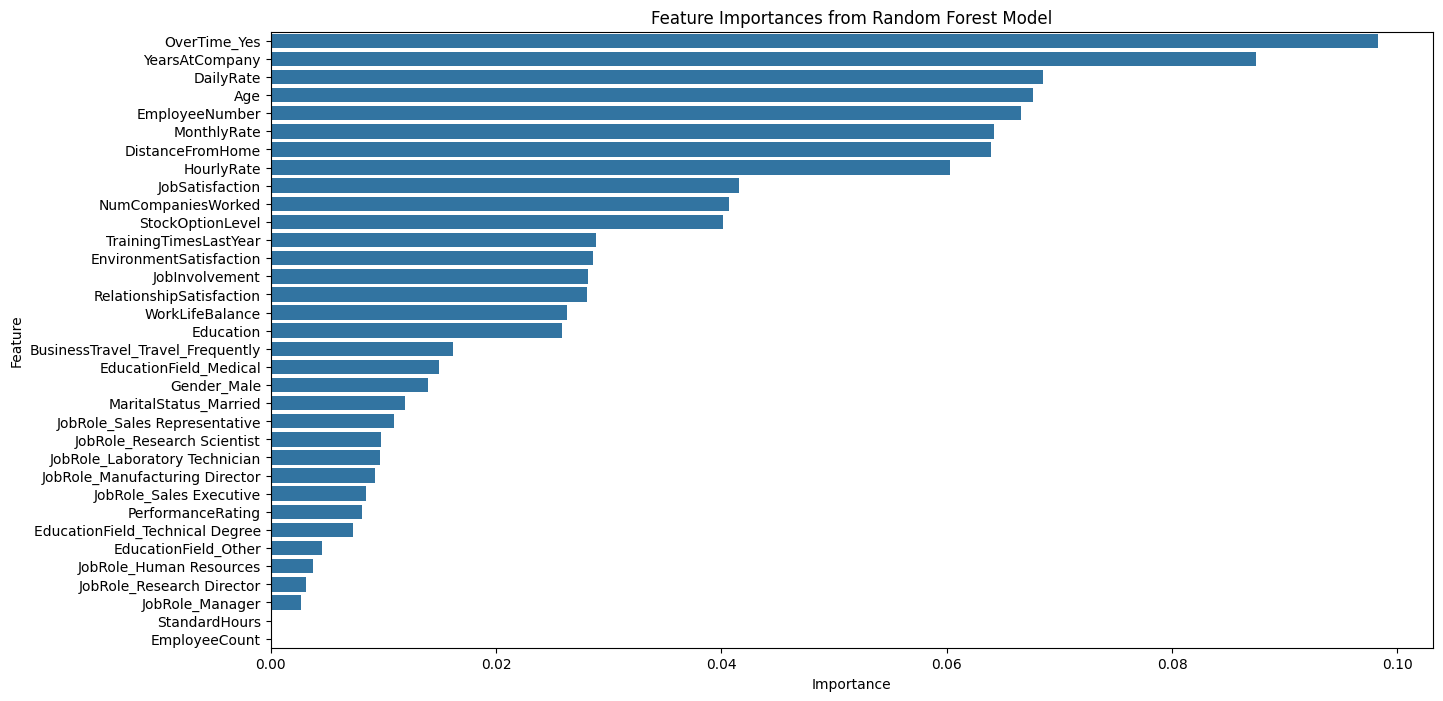

In [67]:
# Train the Random Forest model on the resampled data
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train_resampled, y_train_resampled)

# Get feature importances
importances = rf_model.feature_importances_
features = x_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.show()

## Model Evaluation

In [68]:
# Sample single data point likely to result in staying with the company
sample_employee_stay = pd.DataFrame({
    'Age': [50],  # Older age, more stability
    'DailyRate': [1500],
    'DistanceFromHome': [3],  # Short distance from home
    'Education': [3],  # Example: Bachelor's degree
    'EmployeeCount': [1],
    'EmployeeNumber': [1045],
    'EnvironmentSatisfaction': [4],  # High satisfaction with environment
    'HourlyRate': [80],
    'JobInvolvement': [3],  # Good involvement
    'JobSatisfaction': [4],  # High job satisfaction
    'MonthlyRate': [18000],
    'NumCompaniesWorked': [1],  # Long-term employee, fewer job changes
    'PerformanceRating': [4],  # High performance rating
    'RelationshipSatisfaction': [4],  # High relationship satisfaction
    'StandardHours': [80],
    'StockOptionLevel': [2],  # Some stock options
    'TrainingTimesLastYear': [3],  # Regular training
    'WorkLifeBalance': [4],  # Good work-life balance
    'YearsAtCompany': [20],  # Long tenure at the company
    'BusinessTravel_Travel_Frequently': [0],  # No frequent travel
    'EducationField_Medical': [0],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [1],  # Technical education field
    'Gender_Male': [1],
    'JobRole_Human Resources': [0],
    'JobRole_Laboratory Technician': [0],
    'JobRole_Manager': [0],
    'JobRole_Manufacturing Director': [0],
    'JobRole_Research Director': [0],
    'JobRole_Research Scientist': [0],
    'JobRole_Sales Executive': [1],  # Example: Sales Executive role
    'JobRole_Sales Representative': [0],
    'MaritalStatus_Married': [1],  # Married, stable personal life
    'OverTime_Yes': [0]  # No overtime work
})

# Predicting attrition for the sample employee
attrition_prediction_stay = model_RFC.predict(sample_employee_stay)

# Interpretation
if attrition_prediction_stay[0] == 1:
    print("The model predicts that this employee is likely to leave the company.")
else:
    print("The model predicts that this employee is likely to stay with the company.")


The model predicts that this employee is likely to stay with the company.


In [69]:
# Sample single data point likely to result in staying with the company
sample_employee_stay = pd.DataFrame({
    'Age': [50],  # Older age, more stability
    'DailyRate': [1500],
    'DistanceFromHome': [1],  # Short distance from home ----------------------------
    'Education': [3],  # Example: Bachelor's degree
    'EmployeeCount': [1],
    'EmployeeNumber': [1045],
    'EnvironmentSatisfaction': [4],  # High satisfaction with environment
    'HourlyRate': [80],
    'JobInvolvement': [3],  # Good involvement
    'JobSatisfaction': [4],  # High job satisfaction
    'MonthlyRate': [18000],
    'NumCompaniesWorked': [1],  # Long-term employee, fewer job changes
    'PerformanceRating': [4],  # High performance rating
    'RelationshipSatisfaction': [4],  # High relationship satisfaction
    'StandardHours': [80],
    'StockOptionLevel': [0],  # Some stock options -------------------------------
    'TrainingTimesLastYear': [3],  # Regular training
    'WorkLifeBalance': [4],  # Good work-life balance
    'YearsAtCompany': [20],  # Long tenure at the company
    'BusinessTravel_Travel_Frequently': [0],  # No frequent travel
    'EducationField_Medical': [0],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [1],  # Technical education field
    'Gender_Male': [1],
    'JobRole_Human Resources': [0],
    'JobRole_Laboratory Technician': [0],
    'JobRole_Manager': [0],
    'JobRole_Manufacturing Director': [0],
    'JobRole_Research Director': [0],
    'JobRole_Research Scientist': [0],
    'JobRole_Sales Executive': [1],  # Example: Sales Executive role
    'JobRole_Sales Representative': [0],
    'MaritalStatus_Married': [1],  # Married, stable personal life
    'OverTime_Yes': [0]  # No overtime work
})

# Predicting attrition for the sample employee
attrition_prediction_stay = model_RFC.predict(sample_employee_stay)

# Interpretation
if attrition_prediction_stay[0] == 1:
    print("The model predicts that this employee is likely to leave the company.")
else:
    print("The model predicts that this employee is likely to stay with the company.")


The model predicts that this employee is likely to stay with the company.


##### Prediction for 47 variables:

In [70]:
# Sample single data point based on the features used in the model
sample_employee = pd.DataFrame({
    'Age': [60],
    'DailyRate': [1],
    'DistanceFromHome': [25],
    'Education': [4],  # Example value: 2 for Bachelor’s degree
    'EmployeeCount': [1],
    'EmployeeNumber': [100199],
    'EnvironmentSatisfaction': [3],  # Example value
    'HourlyRate': [60],
    'JobInvolvement': [3],  # Example value
    'JobLevel': [2],
    'JobSatisfaction': [4],  # Example value
    'MonthlyIncome': [5],
    'MonthlyRate': [10000],
    'NumCompaniesWorked': [3],
    'PercentSalaryHike': [12],
    'PerformanceRating': [4],
    'RelationshipSatisfaction': [2],
    'StandardHours': [80],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [10],
    'TrainingTimesLastYear': [2],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [5],
    'YearsInCurrentRole': [3],
    'YearsSinceLastPromotion': [2],
    'YearsWithCurrManager': [1],
    'BusinessTravel_Travel_Frequently': [0],  # Example: Not frequently traveling
    'BusinessTravel_Travel_Rarely': [1],  # Example: Rarely traveling
    'Department_Research & Development': [1],  # Example: Employee in R&D
    'Department_Sales': [0],  # Not in Sales
    'EducationField_Life Sciences': [1],  # Example: Education field in Life Sciences
    'EducationField_Marketing': [0],
    'EducationField_Medical': [0],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [0],
    'Gender_Male': [1],  # Example: Male
    'JobRole_Human Resources': [0],
    'JobRole_Laboratory Technician': [0],
    'JobRole_Manager': [0],
    'JobRole_Manufacturing Director': [0],
    'JobRole_Research Director': [0],
    'JobRole_Research Scientist': [0],
    'JobRole_Sales Executive': [0],
    'JobRole_Sales Representative': [0],
    'MaritalStatus_Married': [0],  # Example: Married
    'MaritalStatus_Single': [0],
    'OverTime_Yes': [0]  # Example: Works overtime
})


# Predicting attrition for the sample employee
attrition_prediction = model_RFC.predict(sample_employee)

# Interpretation
if attrition_prediction[0] == 1:
    print("The model predicts that this employee is likely to leave the company.")
else:
    print("The model predicts that this employee is likely to stay with the company.")


ValueError: X has 47 features, but RandomForestClassifier is expecting 34 features as input.

In [ ]:
# Sample single data point more likely to result in attrition
sample_employee = pd.DataFrame({
    'Age': [45],
    'DailyRate': [1200],
    'DistanceFromHome': [20],  # Longer distance may increase attrition risk
    'Education': [3],  # Example value: 3 for Master’s degree
    'EmployeeCount': [1],
    'EmployeeNumber': [2002],
    'EnvironmentSatisfaction': [1],  # Low satisfaction
    'HourlyRate': [50],
    'JobInvolvement': [2],  # Lower involvement
    'JobLevel': [1],  # Lower job level
    'JobSatisfaction': [1],  # Low job satisfaction
    'MonthlyIncome': [1000],
    'MonthlyRate': [2200],
    'NumCompaniesWorked': [6],  # High number of companies worked at
    'PercentSalaryHike': [10],
    'PerformanceRating': [2],  # Lower performance rating
    'RelationshipSatisfaction': [1],  # Low satisfaction
    'StandardHours': [80],
    'StockOptionLevel': [0],  # No stock options
    'TotalWorkingYears': [15],
    'TrainingTimesLastYear': [1],
    'WorkLifeBalance': [1],  # Poor work-life balance
    'YearsAtCompany': [1],  # Short tenure
    'YearsInCurrentRole': [1],#----------------------------------------------------------
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [1], #------------------------------------------------------
    'BusinessTravel_Travel_Frequently': [1],  # Frequent travel can lead to dissatisfaction
    'BusinessTravel_Travel_Rarely': [0],
    'Department_Research & Development': [0],
    'Department_Sales': [1],  # Employee in Sales
    'EducationField_Life Sciences': [0],
    'EducationField_Marketing': [1],  # Example: Education field in Marketing
    'EducationField_Medical': [0],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [0],
    'Gender_Male': [1],
    'JobRole_Human Resources': [0],
    'JobRole_Laboratory Technician': [0],
    'JobRole_Manager': [0],
    'JobRole_Manufacturing Director': [0],
    'JobRole_Research Director': [0],
    'JobRole_Research Scientist': [0],
    'JobRole_Sales Executive': [1],  # Example: Sales Executive role
    'JobRole_Sales Representative': [0],
    'MaritalStatus_Married': [0],  # Example: Single
    'MaritalStatus_Single': [1],
    'OverTime_Yes': [1]  # Works overtime
})


# Predicting attrition for the sample employee
attrition_prediction = model_RFC.predict(sample_employee)

# Interpretation
if attrition_prediction[0] == 1:
    print("The model predicts that this employee is likely to leave the company.")
else:
    print("The model predicts that this employee is likely to stay with the company.")


The model predicts that this employee is likely to leave the company.


In [ ]:
# Sample single data point more likely to result in attrition
sample_employee = pd.DataFrame({
    'Age': [25],
    'DailyRate': [1200],
    'DistanceFromHome': [20],  # Longer distance may increase attrition risk
    'Education': [2],  # Example value: 3 for Master’s degree
    'EmployeeCount': [1],
    'EmployeeNumber': [2002],
    'EnvironmentSatisfaction': [1],  # Low satisfaction
    'HourlyRate': [500],
    'JobInvolvement': [2],  # Lower involvement
    'JobLevel': [1],  # Lower job level
    'JobSatisfaction': [1],  # Low job satisfaction
    'MonthlyIncome': [3000],
    'MonthlyRate': [2200],
    'NumCompaniesWorked': [6],  # High number of companies worked at
    'PercentSalaryHike': [10],
    'PerformanceRating': [2],  # Lower performance rating
    'RelationshipSatisfaction': [1],  # Low satisfaction
    'StandardHours': [80],
    'StockOptionLevel': [0],  # No stock options
    'TotalWorkingYears': [15],
    'TrainingTimesLastYear': [1],
    'WorkLifeBalance': [1],  # Poor work-life balance
    'YearsAtCompany': [2],  # Short tenure
    'YearsInCurrentRole': [1],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [1],
    'BusinessTravel_Travel_Frequently': [1],  # Frequent travel can lead to dissatisfaction
    'BusinessTravel_Travel_Rarely': [0],
    'Department_Research & Development': [0],
    'Department_Sales': [1],  # Employee in Sales
    'EducationField_Life Sciences': [0],
    'EducationField_Marketing': [1],  # Example: Education field in Marketing
    'EducationField_Medical': [0],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [0],
    'Gender_Male': [1],
    'JobRole_Human Resources': [0],
    'JobRole_Laboratory Technician': [0],
    'JobRole_Manager': [0],
    'JobRole_Manufacturing Director': [0],
    'JobRole_Research Director': [0],
    'JobRole_Research Scientist': [0],
    'JobRole_Sales Executive': [1],  # Example: Sales Executive role
    'JobRole_Sales Representative': [0],
    'MaritalStatus_Married': [0],  # Example: Single
    'MaritalStatus_Single': [1],
    'OverTime_Yes': [0]  # Works overtime
})


# Predicting attrition for the sample employee
attrition_prediction = model_RFC.predict(sample_employee)

# Interpretation
if attrition_prediction[0] == 1:
    print("The model predicts that this employee is likely to leave the company.")
else:
    print("The model predicts that this employee is likely to stay with the company.")


The model predicts that this employee is likely to stay with the company.


In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model_RFC)

# Calculate SHAP values for the sample employee
shap_values = explainer.shap_values(sample_employee)

# Visualize the SHAP values for the sample employee
shap.initjs()
shap.force_plot(explainer.expected_value[1],
                 shap_values[1],
                   sample_employee)


IndexError: index 1 is out of bounds for axis 0 with size 1

## Model evaluation using single variables

In [ ]:
x = attrition[['MonthlyIncome']]
y = attrition['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on training data, and transform on testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
smote = SMOTE(random_state=0)
x_train_resampled, x_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [ ]:
rus = RandomUnderSampler(random_state=0)
x_train_resampled, y_train_resampled = rus.fit_resample(x_train_scaled, y_train)

### Models

In [ ]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[312  59]
 [ 55  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       371
           1       0.20      0.21      0.21        70

    accuracy                           0.74       441
   macro avg       0.53      0.53      0.53       441
weighted avg       0.75      0.74      0.74       441

Accuracy: 0.74


In [ ]:
model = LogisticRegression(random_state=0)
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[371   0]
 [ 70   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441

Accuracy: 0.84


In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[371   0]
 [ 70   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441

Accuracy: 0.84


In [ ]:
model = QuadraticDiscriminantAnalysis()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[371   0]
 [ 70   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441

Accuracy: 0.84


In [ ]:
model = KNeighborsClassifier()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[351  20]
 [ 66   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       371
           1       0.17      0.06      0.09        70

    accuracy                           0.80       441
   macro avg       0.50      0.50      0.49       441
weighted avg       0.73      0.80      0.76       441

Accuracy: 0.80


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[316  55]
 [ 57  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       371
           1       0.19      0.19      0.19        70

    accuracy                           0.75       441
   macro avg       0.52      0.52      0.52       441
weighted avg       0.74      0.75      0.74       441

Accuracy: 0.75


In [ ]:
model = GaussianNB()
model.fit(x_train_scaled, y_train)
model_predictions = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, model_predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, model_predictions))

accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[371   0]
 [ 70   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441

Accuracy: 0.84
